# Exercise 01: Sines and Cosines

In this exercise, you will explore the features of sine and cosine waveforms.

As usual, install the necessary packages:

In [1]:
import sys
!{sys.executable} -m pip install -U pip
!{sys.executable} -m pip install -U numpy matplotlib ipywidgets ipympl

and import the necessary modules:

In [1]:
%matplotlib widget

import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt

The following code creates an interactive plot:

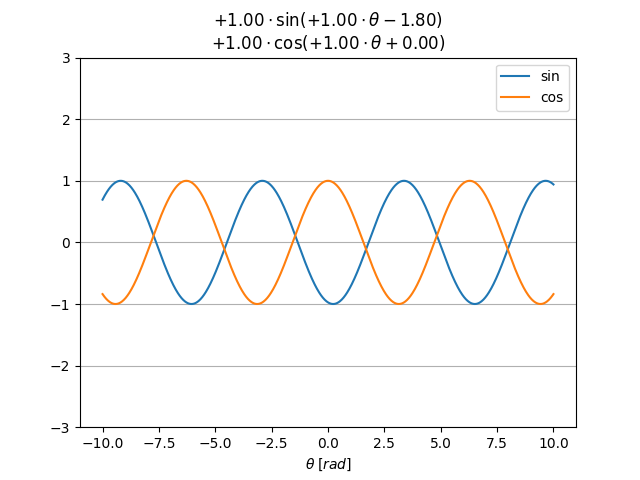

In [2]:
def create_sin_cos_plot():
    thetas = np.linspace(-10.0,+10.0,1000)

    slider_sin_amp   = widgets.FloatSlider(min=-3.0,   max=+3.0,   step=0.05,     value=1.0, description="sin amp",   continuous_update=True)
    slider_sin_freq  = widgets.FloatSlider(min=-5.0,   max=+5.0,   step=0.05,     value=1.0, description="sin freq",  continuous_update=True)
    slider_sin_phase = widgets.FloatSlider(min=-np.pi, max=+np.pi, step=np.pi/20, value=-1.8, description="sin phase", continuous_update=True)

    slider_cos_amp   = widgets.FloatSlider(min=-3.0,   max=+3.0,   step=0.05,     value=1.0, description="cos amp",   continuous_update=True)
    slider_cos_freq  = widgets.FloatSlider(min=-5.0,   max=+5.0,   step=0.05,     value=1.0, description="cos freq",  continuous_update=True)
    slider_cos_phase = widgets.FloatSlider(min=-np.pi, max=+np.pi, step=np.pi/20, value=0.0, description="cos phase", continuous_update=True)

    button_reset = widgets.Button(description='reset plot')
    
    fig = plt.figure()
    fig.canvas.toolbar_visible = False
    fig.canvas.resizable       = False
    
    ax  = fig.add_subplot(1, 1, 1)
    ax.set_ylim(-3.0, +3.0)
    plt.xlabel(r'$\theta \; [rad]$')
    plt.grid(visible=True, which='major', axis='y')
    
    sin_amp, sin_freq, sin_phase = slider_sin_amp.value, slider_sin_freq.value, slider_sin_phase.value
    cos_amp, cos_freq, cos_phase = slider_cos_amp.value, slider_cos_freq.value, slider_cos_phase.value
    plt.title(r'${:+.2f} \cdot \sin({:+.2f} \cdot \theta {:+.2f})$'.format(sin_amp, sin_freq, sin_phase) + "\n" + r'${:+.2f} \cdot \cos({:+.2f} \cdot \theta {:+.2f})$'.format(cos_amp, cos_freq, cos_phase))

    def f_sin():
        amp   = slider_sin_amp.value
        freq  = slider_sin_freq.value
        phase = slider_sin_phase.value
        return amp*np.sin(freq*thetas + phase)

    def f_cos():
        amp   = slider_cos_amp.value
        freq  = slider_cos_freq.value
        phase = slider_cos_phase.value
        return amp*np.cos(freq*thetas + phase)
    
    sin_line, = ax.plot(thetas, f_sin())
    cos_line, = ax.plot(thetas, f_cos())
    ax.legend([sin_line, cos_line], ['sin', 'cos'])
    
    def update_lines(change):
        sin_line.set_ydata(f_sin())
        cos_line.set_ydata(f_cos())
        sin_amp, sin_freq, sin_phase = slider_sin_amp.value, slider_sin_freq.value, slider_sin_phase.value
        cos_amp, cos_freq, cos_phase = slider_cos_amp.value, slider_cos_freq.value, slider_cos_phase.value
        plt.title(r'${:+.2f} \cdot \sin({:+.2f} \cdot \theta {:+.2f})$'.format(sin_amp, sin_freq, sin_phase) + "\n" + r'${:+.2f} \cdot \cos({:+.2f} \cdot \theta {:+.2f})$'.format(cos_amp, cos_freq, cos_phase))
        fig.canvas.draw_idle()

    def reset_plot(dummy):
        slider_sin_amp.value   = 1.0
        slider_sin_freq.value  = 1.0
        slider_sin_phase.value = 0.0
        slider_cos_amp.value   = 1.0
        slider_cos_freq.value  = 1.0
        slider_cos_phase.value = 0.0
        update_lines('dummy')
            
    slider_sin_amp.observe(update_lines, names='value')
    slider_sin_freq.observe(update_lines, names='value')
    slider_sin_phase.observe(update_lines, names='value')
    
    slider_cos_amp.observe(update_lines, names='value')
    
    slider_cos_freq.observe(update_lines, names='value')
    slider_cos_phase.observe(update_lines, names='value')

    button_reset.on_click(reset_plot)
    
    display(
        widgets.HBox([
            widgets.VBox([
                slider_sin_amp, slider_sin_freq, slider_sin_phase
            ]),
            widgets.VBox([
                slider_cos_amp, slider_cos_freq, slider_cos_phase
            ]),
            button_reset
        ])
    )
    
create_sin_cos_plot()

If you create a lot of plots,
you might want to run the following code
from time to time
in order to avoid leaking lots of memory.
It will disable any plots
in this notebook,
so you'll need to re-create them.

In [5]:
plt.close('all')

Focus on the $A \sin(k \theta + \phi)$ waveform for now.
Adjust the amplitude, frequency, and phase sliders
until you are comfortable with their effects.

**What does changing the amplitude do?**

Increasing/Decreasing the amplitude increases the height of the waves in both the negative and positive direction. Applying a number less than 1 but greater than 0 flatens the wave out.

**What does changing the frequency do?**

Changing the frequency squishes or stretches out the wave.

**What does changing the phase do?**

Shifts the wave left or right.

Adjust the amplitude and/or frequency and/or phase of the sine waveform until it matches the cosine waveform.

**What are your final settings?  Explain them both conceptually and algebraically.**

Frequencies and amplitude are the same and the phase of the sine wave is 1.57

Continuing from where the sine and cosine waveforms overlap,
negate the amplitude of the cosine waveform.

**What effect does negating the amplitude have?**

Negating the amplitude inverts the wave.

Continuing from the previous question,
adjust the phase of the cosine
until it matches the sine waveform.

**What does this result say about the relationship between amplitude inversions and phase shifts?  Explain your answer both conceptually and algebraically.**

The relationship between amplitude inversions and phase shifts are that they are inversely proportional.